# PyGAF Recharge Basins

Installed `PyGAF` testing.

In [1]:
import os
import pygaf
%matplotlib inline

Local testing.

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../pygaf'))
import pygaf

# Basin Classes
## `RectBasin` class
The default rectangular basin is square with center at coordinates `cx=0` and `cy=0`, side lengths `lx=10` and `ly=10` and clockwise rotation angle `rot=0`. The `.info` and `.draw` methods display the basin information and diagram.

BASIN INFORMATION
-----------------
Type: Rectangular Basin
Name: Rectangle basin
Basin center: (0.0, 0.0) [L]
Basin x length: 10 [L]
Basin y length: 10 [L]
Basin area: 100 [L2]
Clockwise rotation angle: 0 [deg]



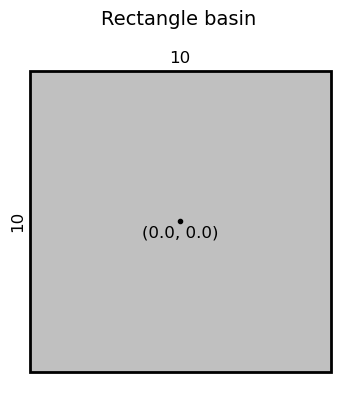

In [2]:
pygaf.RectBasin().info()
pygaf.RectBasin().draw()

Instanciate a non-default basin.

BASIN INFORMATION
-----------------
Type: Rectangular Basin
Name: Basin 1
Basin center: (45, -15) [L]
Basin x length: 50.5 [L]
Basin y length: 15 [L]
Basin area: 757.5 [L2]
Clockwise rotation angle: 10 [deg]



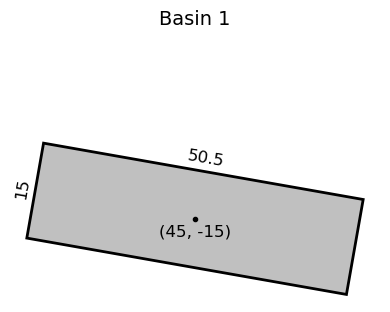

In [3]:
B1 = pygaf.RectBasin(cx=45, cy=-15, lx=50.5, ly=15, rot=10, name='Basin 1')
B1.info()
B1.draw()

## `CircBasin` class
The default circular basin has center at coordinates `cx=0` and `cy=0` and diameter `diam=10`. The `.info` and `.draw` methods display the basin information and diagram.

BASIN INFORMATION
-----------------
Type: Circular Basin
Name: Circle basin
Basin center: (0.0, 0.0) [L]
Basin diameter: 10 [L]
Basin radius: 5.0 [L]
Basin area: 78.5 [L2]



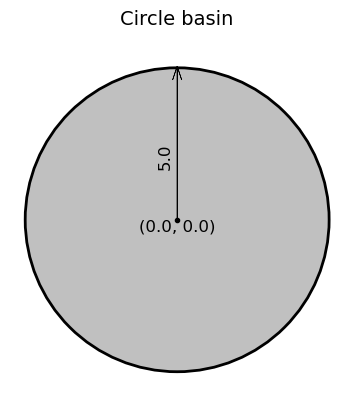

In [4]:
pygaf.CircBasin().info()
pygaf.CircBasin().draw()

Instanciate a non-default basin.

BASIN INFORMATION
-----------------
Type: Circular Basin
Name: Basin 3
Basin center: (75, 10) [L]
Basin diameter: 100 [L]
Basin radius: 50.0 [L]
Basin area: 7854.0 [L2]



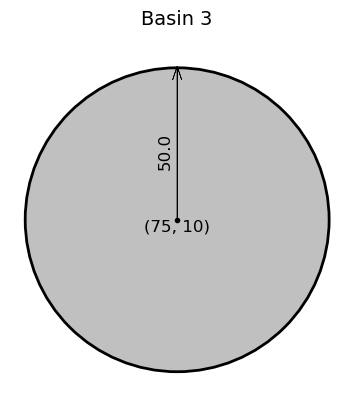

In [5]:
B3 = pygaf.CircBasin(cx=75, cy=10, diam=100, name='Basin 3')
B3.info()
B3.draw()

# Recharge Basin Solutions
## `GloverRectBasinSteady` class
Instanciate a `GloverRectBasinSteady` solution object using a 2D unconfined aquifer object and a rectangular basin object. The aquifer and basin objects are inherited by the solution object and accessed via the `.aq` and `.basin` methods.

In [12]:
AQ = pygaf.Aq2dUnconf(K=10, B=200, Sy=0.2)
RB = pygaf.RectBasin(cx=10, cy=20, lx=50, ly=100, rot=-15)
GB = pygaf.GloverRectBasinSteady()
GB.aq = AQ
GB.basin = RB

Information about the solution object can be displayed using the `.info` methods.

In [13]:
GB.info()
GB.basin.info()
GB.aq.info()

METHOD REFERENCE
----------------
Glover R. E. (1960) - Mathematical derivations as pertain to
groundwater recharge.

Conceptual Model:
- Infinite, unconfined and homogeneous aquifer.
- Rectangular recharge basin with steady state infiltration.
- Spatially uniform infiltration rate.
- Instant transfer of infiltration to water table.

BASIN INFORMATION
-----------------
Type: Rectangular Basin
Name: Rectangle basin
Basin center: (10, 20) [L]
Basin x length: 50 [L]
Basin y length: 100 [L]
Basin area: 5000 [L2]
Clockwise rotation angle: -15 [deg]

AQUIFER INFORMATION
-------------------
Type: 2D, unconfined homogeneous aquifer
Name: Aq2dUnconf class
Hydraulic conductivity: 10 [L/T]
Specific yield: 0.2 [1]
Static saturated thickness: 200 [L]
Static transmissivity: 2000 [L2/T]
Bottom elevation: 0 [RL]
Static water level: 200 [RL]



Drawings can be displayed using the `.draw` methods.

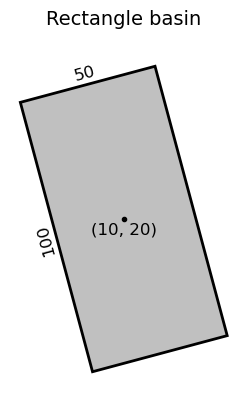

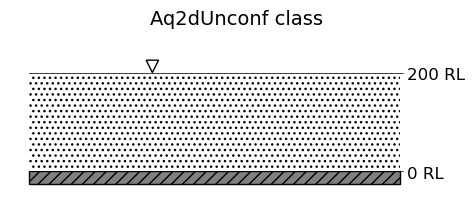

In [14]:
GB.basin.draw()
GB.aq.draw()

### `impress` method
The `impress` method evaluates impress at specified locations and times, which are provided in lists, and for the specified infiltration rate `q`. The method return impress in a Pandas dataframe and basin hydraulic loading, defined as the infiltration rate multiplied by the basin area.

Impress is evaluated at each location and time and a time-series plot of the results is displayed as default. Locations are provided as a list of `(dx, dy)` tupples where `dx` is distance from the basin center in the x direction and `dy` is distance from the basin center in the y direction. The default time-series plot can be suppressed by setting `plot=False`. Custom user plots can be created using the output dataframe and the `plot` method of Pandas.

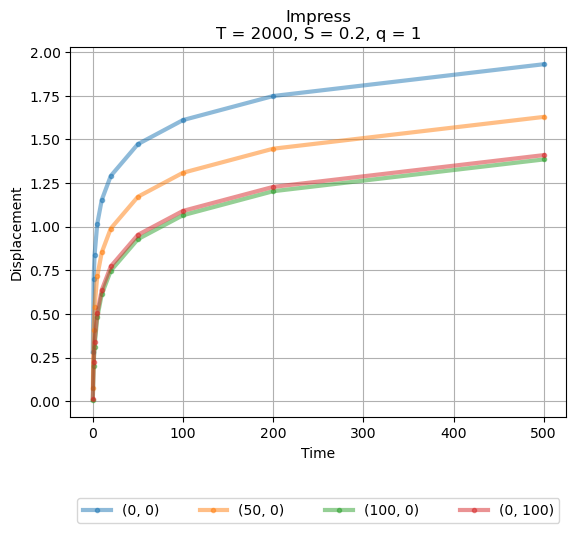

Basin hydraulic loading: 5000 [L3/T]
         (0, 0)   (50, 0)  (100, 0)  (0, 100)
Time                                         
0.1    0.283608  0.073610  0.005542  0.014513
1.0    0.699713  0.409789  0.199966  0.224094
2.0    0.835059  0.539223  0.313222  0.337814
5.0    1.015806  0.716326  0.479859  0.504598
10.0   1.153186  0.852476  0.612385  0.637145
20.0   1.290825  0.989496  0.747567  0.772333
50.0   1.472960  1.171259  0.928218  0.952986
100.0  1.610805  1.308980  1.065567  1.090335
200.0  1.748677  1.446790  1.203190  1.227958
500.0  1.930951  1.629027  1.385316  1.410084


In [15]:
LOCS = [(0, 0), (50, 0), (100, 0), (0, 100)]
TIMES = [0.1, 1, 2, 5, 10, 20, 50, 100, 200, 500]
IMP, Q = GB.impress(locs=LOCS, t=TIMES, q=1)
print('Basin hydraulic loading:', round(Q, 1), '[L3/T]')
print(IMP)

Impress results can be exported to .csv and .xlsx files by setting the `.csv` and `.xlsx` attributes to non-blank strings. File names are supplied with or without file extentions, which will be added if they are ommitted.

In [16]:
OFILE = os.path.join('output', 'imp_results')
IMP = GB.impress(locs=LOCS, t=TIMES, q=1, csv=OFILE, xlsx=OFILE, plot=False)

Results exported to: output/imp_results.csv
Results exported to: output/imp_results.xlsx


### `impress_grid` method
The `impress_grid` method evaluates impress on a grid of points for the specified infiltration rate `q` and time `t`. The method return impress in a Pandas dataframe with columns x, y and impress, and returns the basin hydraulic loading, defined as the infiltration rate multiplied by the basin area. A plot of results is displayed as default and can be suppressed by setting `plot=False`.

Unless otherwise specified, the solution will use a default basin grid with radius 100 and grid density 21 (441 grid points). The grid radius and density are set to other values using the `gr` and `gd` attributes.

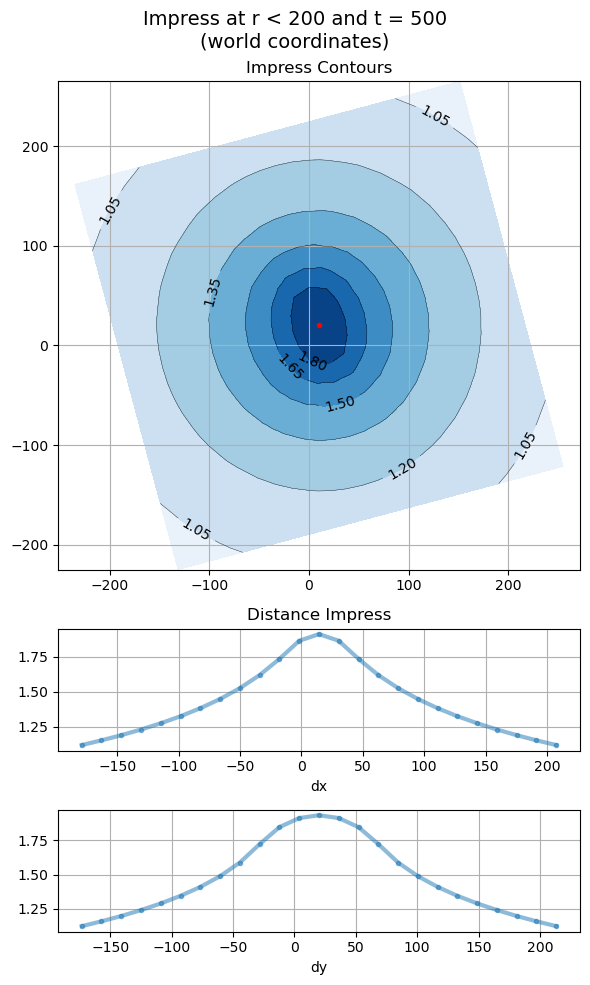

In [17]:
IMPG, Q = GB.impress_grid(t=500, q=1, gr=200, gd=25)

BASIN GRID INFORMATION
----------------------
Grid radius: 200
Number of grid points: 625
Grid density: 25



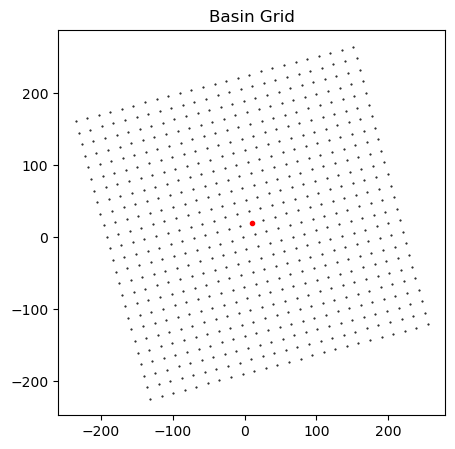

In [18]:
GB.grid.info()
GB.grid.draw()

Evaluate the solution in local coordinates with the basin center at position (0, 0).

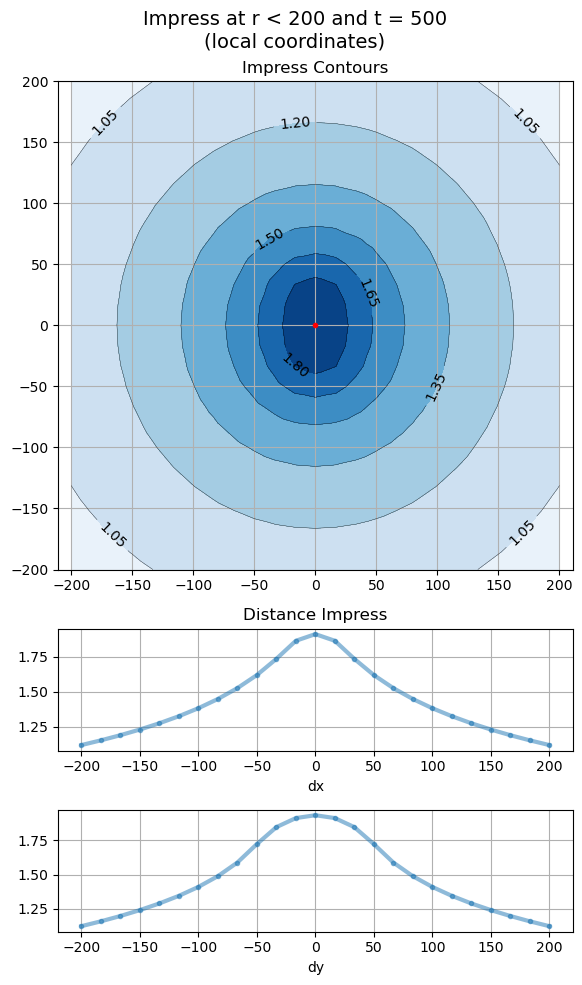

In [19]:
IMPG, Q = GB.impress_grid(t=500, q=1, gr=200, gd=25, local=True)

Impress results can be exported to .csv and .xlsx files by setting the `.csv` and `.xlsx` attributes to non-blank strings. File names are supplied with or without file extentions, which will be added if they are ommitted.

In [20]:
OFILE = os.path.join('output', 'imp_grid_results')
IMPG, Q = GB.impress_grid(t=500, q=1, gd=25, csv=OFILE, xlsx=OFILE, plot=False)

Results exported to: output/imp_grid_results.csv
Results exported to: output/imp_grid_results.xlsx
